# Summer Olympics Data Analysis Assignment

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/summer.csv')
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [4]:
df.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

### 1. In how many cities Summer Olympics is held so far?

In [5]:
print(f"No of Cities where Summer olympic is held: {len(df['City'].unique())}")

No of Cities where Summer olympic is held: 22


### 2. Which sport is having most number of Gold Medals so far? (Top 5)

In [6]:
x = df[df['Medal'] == 'Gold']
gold_medal = []
for Sport in x['Sport'].unique():
    gold_medal.append([Sport, len(x[x['Sport'] == Sport])])

gold_medal = pd.DataFrame(gold_medal, columns = ['Sport', 'Gold Medal'])
gold_medal = gold_medal.sort_values(by = 'Gold Medal', ascending = False).head()
gold_medal

,Sport,Gold Medal
0,Aquatics,1421
1,Athletics,1215
17,Rowing,890
4,Gymnastics,820
3,Fencing,552


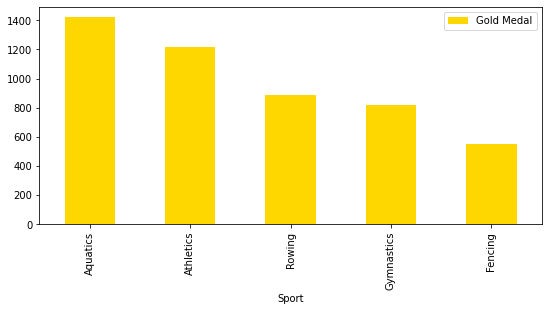

In [7]:
gold_medal.plot(x = 'Sport', y = 'Gold Medal', kind = 'bar', color = 'gold', figsize = (9,4))
plt.show()

### 3. Which sport is having most number of medals so far? (Top 5)

In [8]:
all_medals = []
for Sport in df['Sport'].unique():
    all_medals.append([Sport, len(df[df['Sport'] == Sport])])

all_medals = pd.DataFrame(all_medals, columns = ['Sport', 'Medals'])
all_medals = all_medals.sort_values(by = 'Medals', ascending = False).head()

all_medals

,Sport,Medals
0,Aquatics,4170
1,Athletics,3638
17,Rowing,2667
4,Gymnastics,2307
3,Fencing,1613


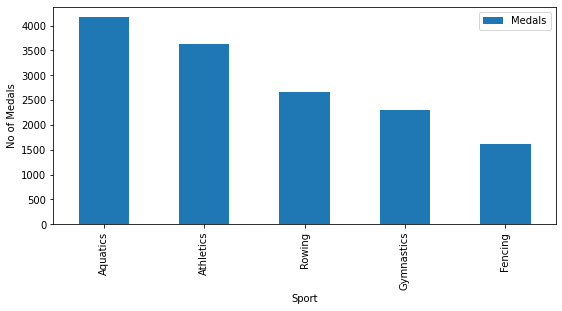

In [9]:
all_medals.plot(x = 'Sport', y = 'Medals', kind = 'bar', figsize = (9,4))
plt.ylabel('No of Medals')
plt.show()

### 4. Which player has won most number of medals? (Top 5)

In [10]:
player = []
for name in df['Athlete'].unique():
    player.append([name, len(df[df['Athlete'] == name])])

player = pd.DataFrame(player, columns = ['Player', 'Medals'])
player = player.sort_values(by = 'Medals', ascending = False).head()

player

,Player,Medals
18640,"PHELPS, Michael",22
7197,"LATYNINA, Larisa",18
9948,"ANDRIANOV, Nikolay",15
6591,"ONO, Takashi",13
5103,"MANGIAROTTI, Edoardo",13


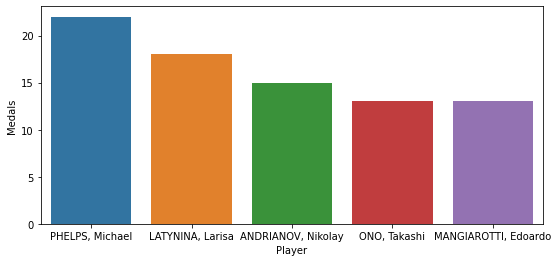

In [11]:
plt.figure(figsize = (9,4))
sns.barplot(x = 'Player', y = 'Medals',data=player)
plt.show()

### 5. Which player has won most number Gold Medals of medals? (Top 5)

In [12]:
x = df[df['Medal'] == 'Gold']

pl_gold = []
for i in x['Athlete'].unique():
    pl_gold.append([i, len(x[x['Athlete'] == i])])

pl_gold = pd.DataFrame(pl_gold, columns = ['Player', 'Gold Medals'])
pl_gold = pl_gold.sort_values(by = 'Gold Medals', ascending = False).head()

pl_gold

,Player,Gold Medals
6851,"PHELPS, Michael",18
3320,"SPITZ, Mark",9
2714,"LATYNINA, Larisa",9
4630,"LEWIS, Carl",9
907,"NURMI, Paavo",9


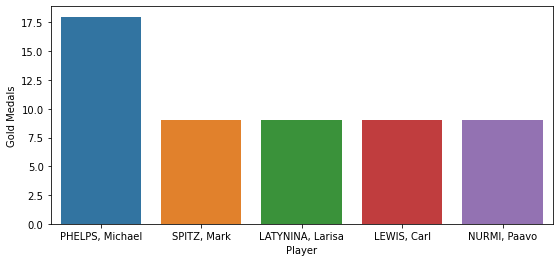

In [13]:
plt.figure(figsize = (9,4))
sns.barplot(x = 'Player', y = 'Gold Medals',data=pl_gold)
plt.show()

### 6. In which year India won first Gold Medal in Summer Olympics?

In [19]:
x = df[df['Medal'] == 'Gold']
y = x.loc[x['Country'] == 'IND']
y.iloc[0]

print(f"The first Gold Medal won by India in the year of {y['Year'].iloc[0]}")


The first Gold Medal won by India in the year of 1928


### 7. Which event is most popular in terms on number of players? (Top 5)

In [25]:
event = []
for eve_name in df['Event'].unique():
    event.append([eve_name, len(df[df['Event'] == eve_name])])

event = pd.DataFrame(event, columns = ['Event', 'Players'])
event = event.sort_values(by = 'Players', ascending = False).head()
event

,Event,Players
80,Football,1497
176,Hockey,1422
138,Team Competition,1147
327,Basketball,1012
337,Handball,973


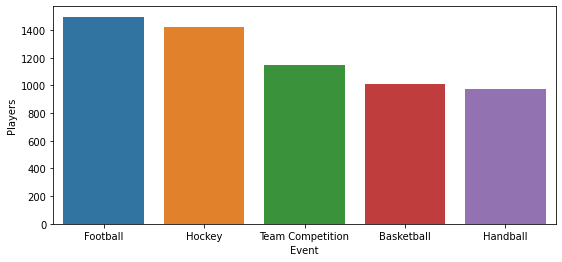

In [26]:
plt.figure(figsize = (9,4))
sns.barplot(x = 'Event', y = 'Players',data=event)
plt.show()

### 8. Which sport is having most female Gold Medalists? (Top 5)

In [29]:
medal = df[df['Medal'] == 'Gold']
gender = medal[medal['Gender'] == 'Women']

women_gold = []

for i in gender['Sport'].unique():
    women_gold.append([i, len(gender[gender['Sport'] == i])])

women_gold = pd.DataFrame(women_gold, columns = ['Sport', 'Female Gold Medalists'])
women_gold = women_gold.sort_values(by = 'Female Gold Medalists', ascending = False).head()

women_gold

,Sport,Female Gold Medalists
4,Aquatics,589
7,Athletics,389
8,Gymnastics,268
14,Rowing,217
11,Volleyball,166


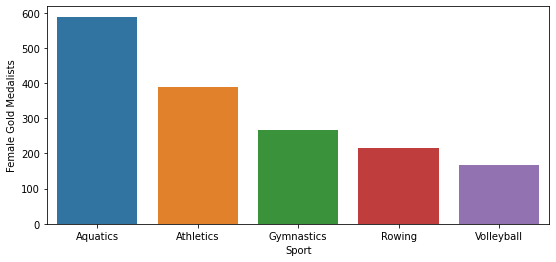

In [30]:
plt.figure(figsize = (9,4))
sns.barplot(x = 'Sport', y = 'Female Gold Medalists',data=women_gold)
plt.show()